In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns

In [3]:
# Read the dataset into python environment
wine =pd.read_csv('/content/Wine_clust .csv')

In [ ]:
# Understand number of rows and columns
wine.shape
# It consists of 178 samples of wine, each with 13 chemical features

(178, 13)

In [ ]:
# Display 1st 4 rows
wine.head(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


In [ ]:
# Check null values
wine.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [ ]:
# Statistics
wine.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: xlabel='Alcohol', ylabel='Malic_Acid'>

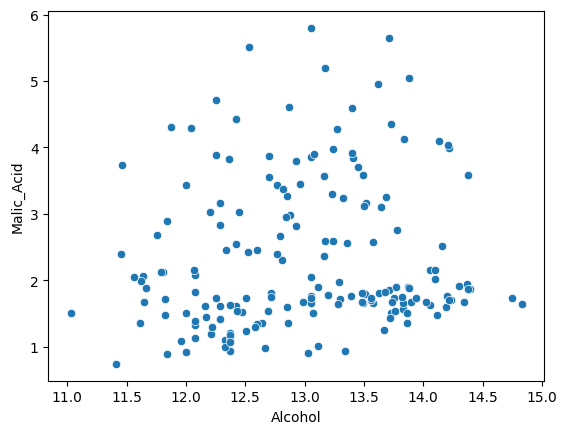

In [ ]:
# Check the datas in Alcohol and	Malic_Acid
sns.scatterplot(x='Alcohol',y='Malic_Acid',data=wine)

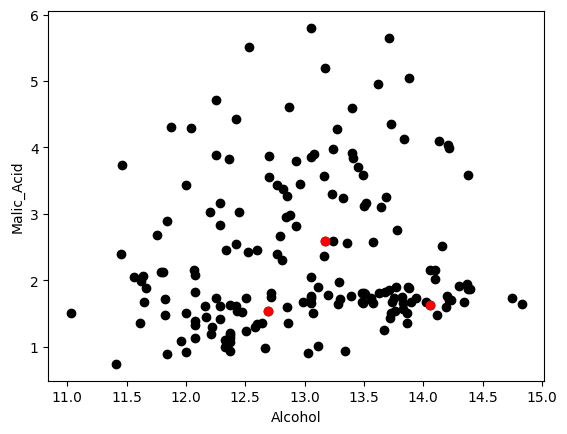

In [5]:
# step 1 - choosen the number of cluster (k=3)
# step 2 -selecting random centroid for each cluster
X =wine
# number of clusters
K = 3
# selecting random observation as centroids
Centroids = X.sample(n=K)

plt.scatter(X['Alcohol'], X['Malic_Acid'], c='black')  # Scatter plot of data points
plt.scatter(Centroids['Alcohol'], Centroids['Malic_Acid'], c='red')  # Scatter plot of centroids
plt.xlabel('Alcohol')#set xlabel
plt.ylabel('Malic_Acid')#set ylabel
plt.show()

# K-Means Clustering

In [24]:
from sklearn.cluster import KMeans
# Create a KMeans model
kmeans = KMeans(n_clusters=K, random_state=0)

# Fit the model to your data and get cluster assignments
X['Cluster'] = kmeans.fit_predict(X[['Alcohol', 'Malic_Acid']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-24-8f4a56251219>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.fit_predict(X[['Alcohol', 'Malic_Acid']])


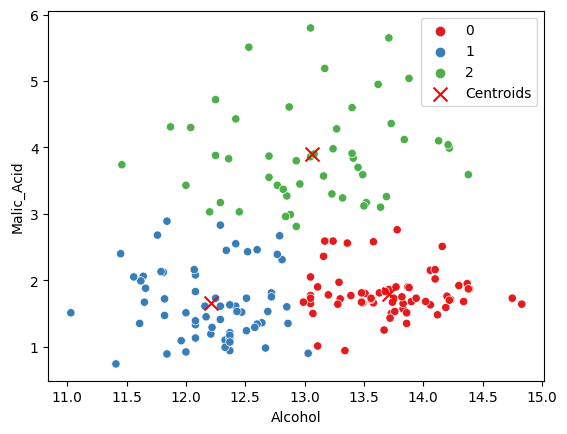

In [7]:
# Get cluster centroids
centroids = kmeans.cluster_centers_

# Plot the data points and centroids
sns.scatterplot(data=X, x="Alcohol", y="Malic_Acid", hue="Cluster", palette="Set1")

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.legend()
plt.show()

plot the data points with different colors representing the clusters and red 'x' markers for the cluster centroids.

In [8]:
#Get the inertia (within cluster sum of squares)
inertia = kmeans.inertia_

#print the inertia
print("Inertia:",inertia)

Inertia: 95.55394205616608


 a common step in evaluating the performance of a k-means clustering algorithm by calculating the inertia. The inertia is the within-cluster sum of squares, which represents the sum of squared distances between data points and their assigned cluster centroids

# Optimal k value Elbow method

The elbow method is a technique used to determine the optimal number of clusters (k) in a k-means clustering algorithm. It involves running the k-means algorithm on the dataset for a range of values of k and then plotting the sum of squared distances (inertia) for each k. The "elbow" of the plot is considered the point where the rate of decrease in inertia sharply changes, suggesting an optimal number of clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

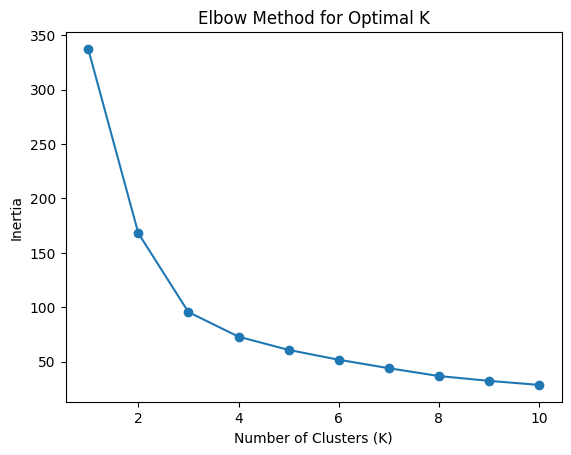

In [12]:
# Define a range of K values to test
k_range = range(1, 11)#This creates a range of values for K, the number of clusters, from 1 to 10.
inertia_values = []

# Calculate the inertia for different values of k
for K in k_range:   #Iterates through each value of K in the specified range
    kmeans = KMeans(n_clusters=K, random_state=0) # Creates a k-means clustering model with the current value of K.
    kmeans.fit(X[["Alcohol", "Malic_Acid"]])
    inertia = kmeans.inertia_  #Retrieves the inertia (sum of squared distances of samples to their closest cluster center) for the current clustering.
    inertia_values.append(inertia) #Appends the inertia value to a list

# Plot the inertia values
plt.plot(k_range, inertia_values, marker='o')# Plots the inertia values against the number of clusters (K). The 'o' marker is used for each data point
plt.title("Elbow Method for Optimal K")#set the title
plt.xlabel("Number of Clusters (K)")#set the xlabel
plt.ylabel("Inertia")#Set the ylabel
plt.show() #Display the plot

This should generate a plot showing the inertia values for different values of k . the "elbow" point to determine a reasonable value for the number of clusters.

# Evaluating Algorithm

In [29]:
# Evaluate the clustering using silhouette score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X[['Alcohol', 'Malic_Acid']],X['Cluster'])
print("Sillhouette Score:", silhouette_avg)


Sillhouette Score: 0.45975365786392636


The silhouette score is measure of howsimilar data points within the same cluster are compared tobdata points in different clusters.It helps to assess the quality of the clustering.

The silhouette score is a metric that ranges from -1 to 1.
 A higher silhouette score indicates better-defined clusters. Here's a general interpretation of silhouette scores:

Close to +1: The sample is far away from the neighboring clusters, indicating that the assigned cluster is appropriate.

Around 0: The sample is on or very close to the decision boundary between two neighboring clusters.

Close to -1: The sample is misclassified and might be better assigned to a neighboring cluster.

A silhouette score of 0.45 is relativly high. It suggests that the clusters are reasonably similar to each other and different to data points in other cluster.Clustering is relatively good.

# Hierarcial Clustering

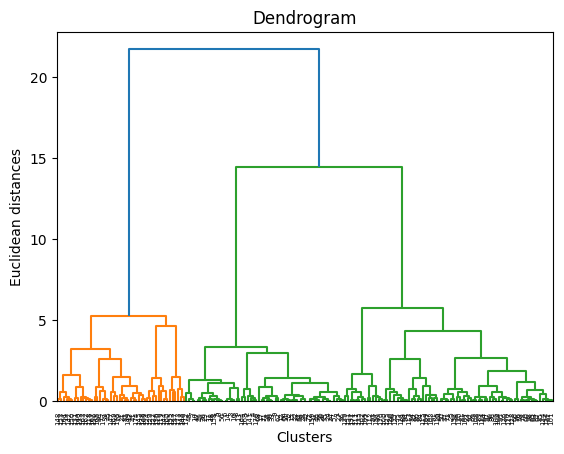

In [30]:
# using the dendrogam to find the optimal number of clusters
import scipy.cluster.hierarchy as sch

#Plot the dendrogram
dendrogram =sch.dendrogram(sch.linkage(X,method='ward'))#This performs hierarchical/agglomerative clustering using the Ward method, and it returns a linkage matrix that can be used to construct the dendrogram
plt.title("Dendrogram")#set the title
plt.xlabel("Clusters")#set the xlabel
plt.ylabel("Euclidean distances")#Set the ylabel
plt.show() #Display the plot

# Agglomerative Clustering

In [41]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc =AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage ='ward')
y_hc =hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


# Ward Linkage Method

The distance between 2 clusters is the sum of suared deviations from points to centroids.The objective ward's linkage is to minimize the within cluster sum of squares.

In [42]:
y_hc # there are 3 clusters --> 0,1,2

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 1,
       0, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 1, 1, 1,
       2, 1])

In [43]:
X_np=X.values # X is a df ie,convert into numpy array

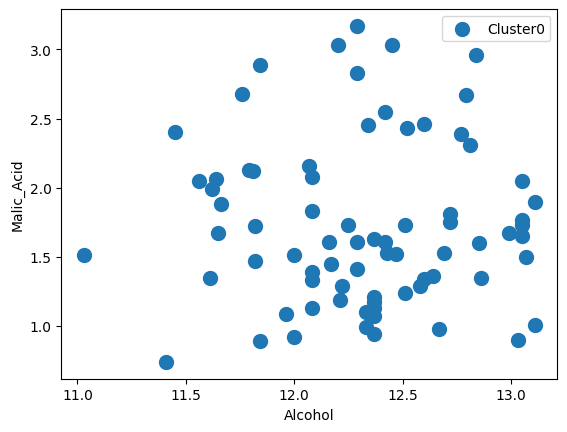

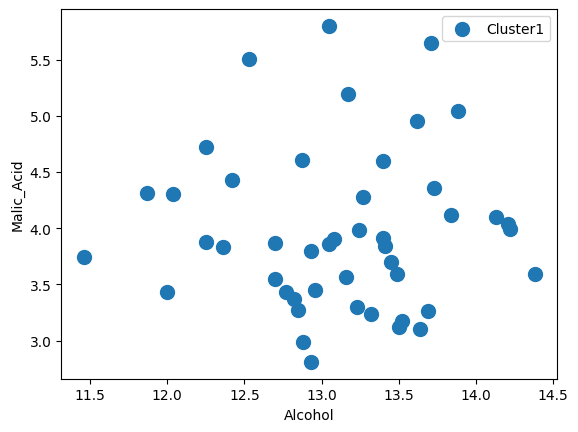

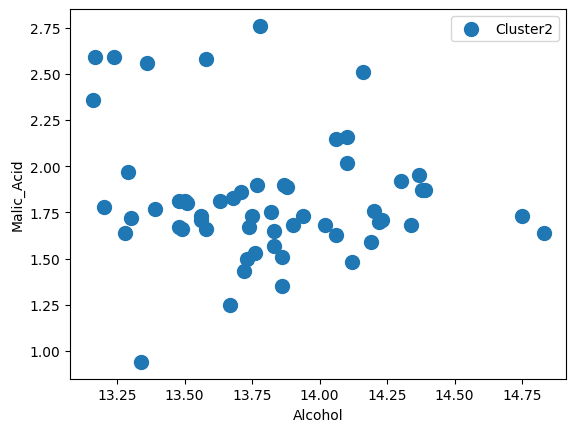

In [52]:
#Visualising the clusters
import matplotlib.pyplot as plt

#Assuming y_hc contains cluster labels
for cluster_label in range(3):#Assume 3 clusters
    plt.scatter(X_np[y_hc ==cluster_label,0],X_np[y_hc==cluster_label,1],s=100,label=f'Cluster{cluster_label}')
    # This ensures that the label includes a space between "Cluster" and the actual cluster label for better readability in the legend.
    plt.xlabel('Alcohol')
    plt.ylabel('Malic_Acid')
    plt.legend()
    plt.show()

Clustering in the context of databases often refers to the process of grouping similar items or data points together based on certain characteristics. Some common clustering algorithms used in data analysis and databases include k-means, hierarchical clustering, and DBSCAN (Density-Based Spatial Clustering of Applications with Noise).

If you were referring to "DBSCAN," it is a clustering algorithm that groups together data points that are close to each other and separates areas of lower point density. It's particularly useful when dealing with data that might not form well-defined spherical or globular clusters.

Here's a brief overview of DBSCAN:

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
Density-Based: It groups together data points that are close to each other in the feature space.
Spatial Clustering: It's designed to work well in spaces where clusters are irregularly shaped.
Noise Tolerance: It can identify points that do not belong to any cluster as outliers or noise.
Key Parameters:

Epsilon (eps): The maximum distance between two samples for one to be considered as in the neighborhood of the other.
Min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
How it works:

1.Core Points: Identify core points based on the density (number of points within a certain distance).
2.Directly Density-Reachable: Form clusters by connecting core points that are directly density-reachable.
3.Density-Reachable: Extend clusters by adding points that are density-reachable to the existing clusters.
4.Noise Points: Points that are neither core points nor density-reachable from a core point are treated as noise.

<ipython-input-51-3b1e4d350a46>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = dbscan.fit_predict(X)


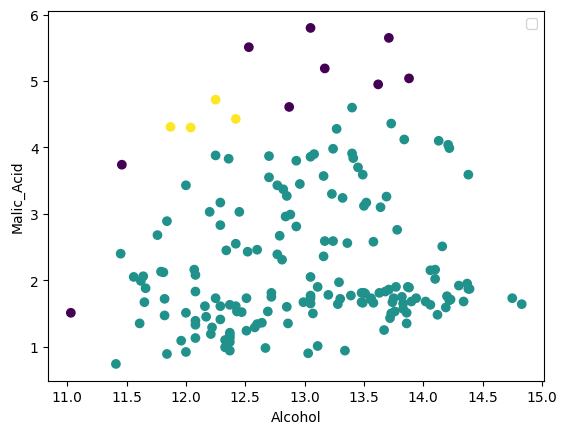

In [51]:
from sklearn.cluster import DBSCAN#Import the DBSCAN class from scikit-learn

# Assuming X is your DataFrame with selected columns for clustering
selected_columns =['Alcohol', 'Malic_Acid']
X = wine[selected_columns]

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)#Create a DBSCAN model with specified parameters (adjust eps and min_samples based on your data)
X['Cluster'] = dbscan.fit_predict(X)#Fit the model to the data and assign cluster labels to a new column in the DataFrame

# Visualize the clusters
plt.scatter(X['Alcohol'], X['Malic_Acid'], c=X['Cluster'], cmap='viridis')
#Scatter plot the data points, color-coded by their assigned clusters

# Assuming X is your DataFrame with selected columns for clustering
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.legend()
plt.show()